In [1]:
import time

In [2]:
# point all tiles at the horizon at 24°
tilebeam.HBAT_pointing_direction_RW=[("AZELGEO","24deg","0deg")]*96
    
# wait for pointing to be applied
time.sleep(0.5)

# obtain and print delays
steps = recv.HBAT_BF_delay_steps_RW[0].reshape(2,4,4)[0]
steps

array([[28, 28, 28, 28],
       [19, 19, 19, 19],
       [11, 11, 11, 11],
       [ 3,  3,  3,  3]])

In [3]:
# process these angles
angles = (0, 90, 180, 270)
directions = ["North", "East", "South", "West"]

In [4]:
for angle, direction in zip(angles, directions):
    # set angles
    tilebeam.HBAT_pointing_direction_RW=[("AZELGEO",f"{angle}deg","0deg")]*96
    
    # obtain delays
    time.sleep(0.5)
    steps = recv.HBAT_BF_delay_steps_RW[0].reshape(2,4,4)[0]
    
    print(f"Pointing {direction}")
    print(steps)
    print()

Pointing North
[[31 29 25 22]
 [24 21 17 14]
 [17 14 10  7]
 [ 9  6  2  0]]

Pointing East
[[ 9 17 24 31]
 [ 6 14 21 29]
 [ 2 10 17 25]
 [ 0  7 14 22]]

Pointing South
[[ 0  2  6  9]
 [ 7 10 14 17]
 [14 17 21 24]
 [22 25 29 31]]

Pointing West
[[22 14  7  0]
 [25 17 10  2]
 [29 21 14  6]
 [31 24 17  9]]



In [5]:
import matplotlib.pyplot as plt
from matplotlib import transforms

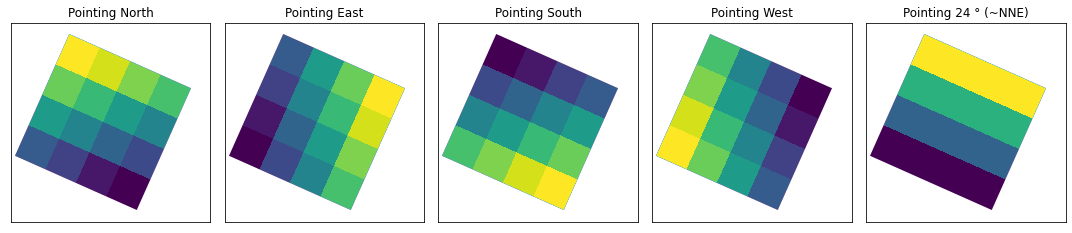

In [7]:
# process these angles
angles = (0, 90, 180, 270, 24)
directions = ["North", "East", "South", "West", "24 ° (~NNE)"]

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for idx, (angle, direction) in enumerate(zip(angles, directions)):
    # set angles
    tilebeam.HBAT_pointing_direction_RW=[("AZELGEO",f"{angle}deg","0deg")]*96
    
    # obtain delays
    time.sleep(0.5)
    steps = recv.HBAT_BF_delay_steps_RW[0].reshape(2,4,4)[0]

    # plot on top row
    ax = axs[idx]
    im = ax.imshow(steps, origin="upper")
    im.set_transform(transforms.Affine2D().rotate_deg(24) + ax.transData)
    ax.set_title(f"Pointing {direction}")
    ax.set_xlim(-2, 4)
    ax.set_ylim(5, -1)

plt.tight_layout()
plt.show()